# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

In [3]:
calls.info()
print()
internet.info()
print()
messages.info()
print()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  D

In [4]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [6]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


## Plans

In [7]:
# Print the general/summary information about the plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
# Print a sample of data for plans
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

[Fix obvious issues with the data given the initial observations.]

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [9]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Print a sample of data for users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [11]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [12]:
users['has_churned'] = users['churn_date'].notna()

## Calls

In [13]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Print a sample of data for calls
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Print a sample of data for messages
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [18]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [19]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Print a sample of data for the internet traffic
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [22]:
# Print out the plan conditions and make sure they are clear for you
print(plans.set_index('plan_name'))
# As we can see, the surf plan is much cheaper but also doesn't include as much.
# It has half the mb per month, way less messages and minutes

           messages_included  mb_per_month_included  minutes_included  \
plan_name                                                               
surf                      50                  15360               500   
ultimate                1000                  30720              3000   

           usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
plan_name                                                                
surf                    20          10             0.03            0.03  
ultimate                70           7             0.01            0.01  


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [23]:
# Calculate the number of calls made by each user per month. Save the result.
calls['month'] = calls['call_date'].dt.to_period('M')
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls_count=('id', 'count')).reset_index()
print(calls_per_month)


      user_id    month  calls_count
0        1000  2018-12           16
1        1001  2018-08           27
2        1001  2018-09           49
3        1001  2018-10           65
4        1001  2018-11           64
...       ...      ...          ...
2253     1498  2018-12           39
2254     1499  2018-09           41
2255     1499  2018-10           53
2256     1499  2018-11           45
2257     1499  2018-12           65

[2258 rows x 3 columns]


In [24]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls['duration_rounded'] = np.ceil(calls['duration'])
minutes_per_month = calls.groupby(['user_id', 'month']).agg(total_minutes =('duration_rounded', 'sum')).reset_index()
print(minutes_per_month)


      user_id    month  total_minutes
0        1000  2018-12          124.0
1        1001  2018-08          182.0
2        1001  2018-09          315.0
3        1001  2018-10          393.0
4        1001  2018-11          426.0
...       ...      ...            ...
2253     1498  2018-12          339.0
2254     1499  2018-09          346.0
2255     1499  2018-10          385.0
2256     1499  2018-11          308.0
2257     1499  2018-12          496.0

[2258 rows x 3 columns]


In [25]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['month'] = messages['message_date'].dt.to_period('M')
messages_per_month = messages.groupby(['user_id', 'month']).agg(total_messages = ('id', 'count')).reset_index()
print(messages_per_month)


      user_id    month  total_messages
0        1000  2018-12              11
1        1001  2018-08              30
2        1001  2018-09              44
3        1001  2018-10              53
4        1001  2018-11              36
...       ...      ...             ...
1801     1496  2018-09              21
1802     1496  2018-10              18
1803     1496  2018-11              13
1804     1496  2018-12              11
1805     1497  2018-12              50

[1806 rows x 3 columns]


In [26]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet['month'] = internet['session_date'].dt.to_period('M')
internet_per_month = internet.groupby(['user_id', 'month']).agg(total_mb_used = ('mb_used', 'sum')).reset_index()
print(internet_per_month)


      user_id    month  total_mb_used
0        1000  2018-12        1901.47
1        1001  2018-08        6919.15
2        1001  2018-09       13314.82
3        1001  2018-10       22330.49
4        1001  2018-11       18504.30
...       ...      ...            ...
2272     1498  2018-12       23137.69
2273     1499  2018-09       12984.76
2274     1499  2018-10       19492.43
2275     1499  2018-11       16813.83
2276     1499  2018-12       22059.21

[2277 rows x 3 columns]


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [27]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
user_monthly = calls_per_month.merge(minutes_per_month, on = ['user_id', 'month'], how='outer')
user_monthly = user_monthly.merge(messages_per_month, on = ['user_id', 'month'], how='outer')
user_monthly = user_monthly.merge(internet_per_month, on = ['user_id', 'month'], how='outer')
user_monthly = user_monthly.fillna(0)
user_monthly.head()


,user_id,month,calls_count,total_minutes,total_messages,total_mb_used
0,1000,2018-12,16.0,124.0,11.0,1901.47
1,1001,2018-08,27.0,182.0,30.0,6919.15
2,1001,2018-09,49.0,315.0,44.0,13314.82
3,1001,2018-10,65.0,393.0,53.0,22330.49
4,1001,2018-11,64.0,426.0,36.0,18504.30


In [28]:
# Add the plan information
user_monthly = user_monthly.merge(users[['user_id','plan']], on = 'user_id', how = 'left')

plans = plans.rename(columns={'plan_name': 'plan'})

user_monthly = user_monthly.merge(plans, on='plan', how='left')

user_monthly = user_monthly.merge(users[['user_id', 'city']], on = 'user_id', how = 'left')

user_monthly.head()

,user_id,month,calls_count,total_minutes,total_messages,total_mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,city
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,"Seattle-Tacoma-Bellevue, WA MSA"


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [29]:
# Calculate the monthly revenue for each user
def calculate_revenue(row):
    #for this function needed to check for any overused minutes or messages. max() will take the higher of the 2 values which will tell me if they went over in either category
    extra_minutes = max(row['total_minutes'] - row['minutes_included'], 0)
    extra_messages = max(row['total_messages'] - row['messages_included'], 0)

    #need to first convert the mb to gb to compare usage and then do the same thing as above.
    gb_used = np.ceil(row['total_mb_used']/1024)
    gb_included = row['mb_per_month_included']/1024
    extra_gb = max(gb_used-gb_included, 0)

    # Now that I have that, time to actually calculate the revenue
    revenue = (
        row['usd_monthly_pay'] + extra_minutes * row['usd_per_minute'] + extra_messages * row['usd_per_message'] + extra_gb * row['usd_per_gb']
    )

    return revenue

user_monthly['monthly_revenue'] = user_monthly.apply(calculate_revenue, axis = 1)

user_monthly.head()

,user_id,month,calls_count,total_minutes,total_messages,total_mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,city,monthly_revenue
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,"Seattle-Tacoma-Bellevue, WA MSA",90.09
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,"Seattle-Tacoma-Bellevue, WA MSA",60.00


### Calls

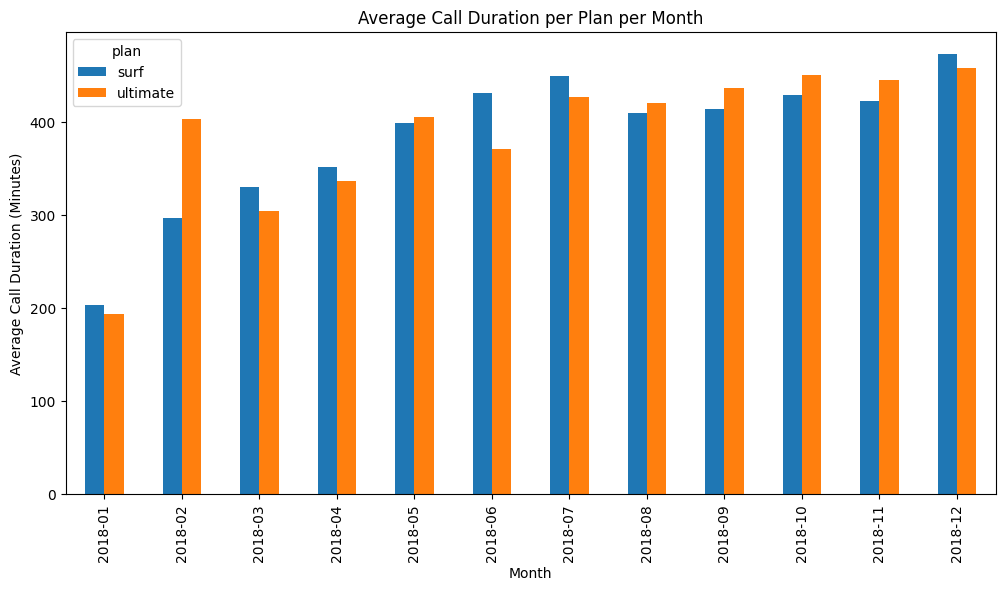

In [30]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# this should group the data by plan and month before calculating the mean.
avg_minutes = user_monthly.groupby(['plan', 'month'])['total_minutes'].mean().unstack()

avg_minutes.T.plot(
    kind='bar', 
    figsize=(12,6), 
    title = 'Average Call Duration per Plan per Month', 
    xlabel = 'Month',
    ylabel = 'Average Call Duration (Minutes)',
)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

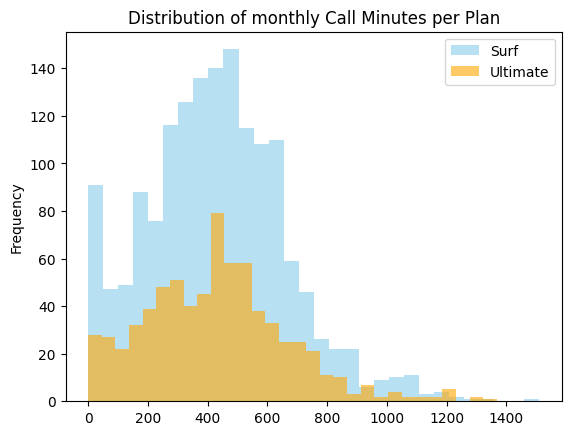

In [31]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
surf_minutes = user_monthly[user_monthly['plan'] == 'surf']['total_minutes']
ultimate_minutes = user_monthly[user_monthly['plan'] == 'ultimate']['total_minutes']

surf_minutes.plot(kind = 'hist', bins = 30, alpha = 0.6, label = 'Surf', color = 'skyblue', title = 'Distribution of monthly Call Minutes per Plan', xlabel = 'Minutes used', ylabel = 'Number of Users')
ultimate_minutes.plot(kind = 'hist', bins = 30, alpha = 0.6, label = 'Ultimate', color = 'orange')
plt.legend()
plt.show

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [32]:
# Calculate the mean and the variance of the monthly call duration
call_stats = user_monthly.groupby('plan')['total_minutes'].agg(['mean', 'var']).round(2)
print(call_stats)


            mean       var
plan                      
surf      428.75  54968.28
ultimate  430.45  57844.46


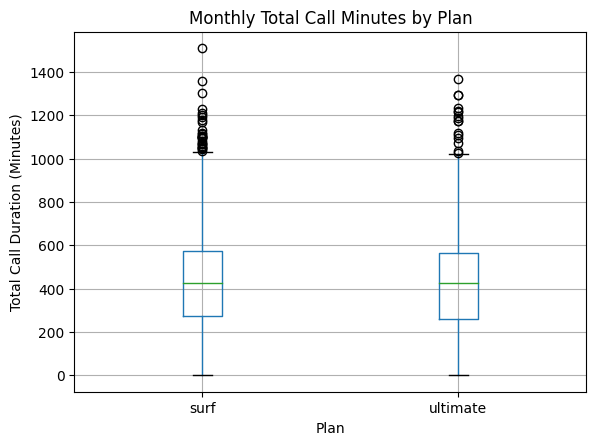

In [33]:
# Plot a boxplot to visualize the distribution of the monthly call duration
user_monthly.boxplot(column = 'total_minutes', by = 'plan')
plt.title('Monthly Total Call Minutes by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Total Call Duration (Minutes)')
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

Both Surf and Ultimate have similar medians meaning that customers of both plans have a fairly similar call duration.

The Interquartile Range of both sets of customers is also very similar. This means that the user behavior is comparable between the plans.

Both plans have a significant amount of outliers which suggests that regardless of plans there are people making lengthy calls.

Due to having similar data points with regards to the plan so its probably some other part of the plan that have the customers paying for the plans.

### Messages

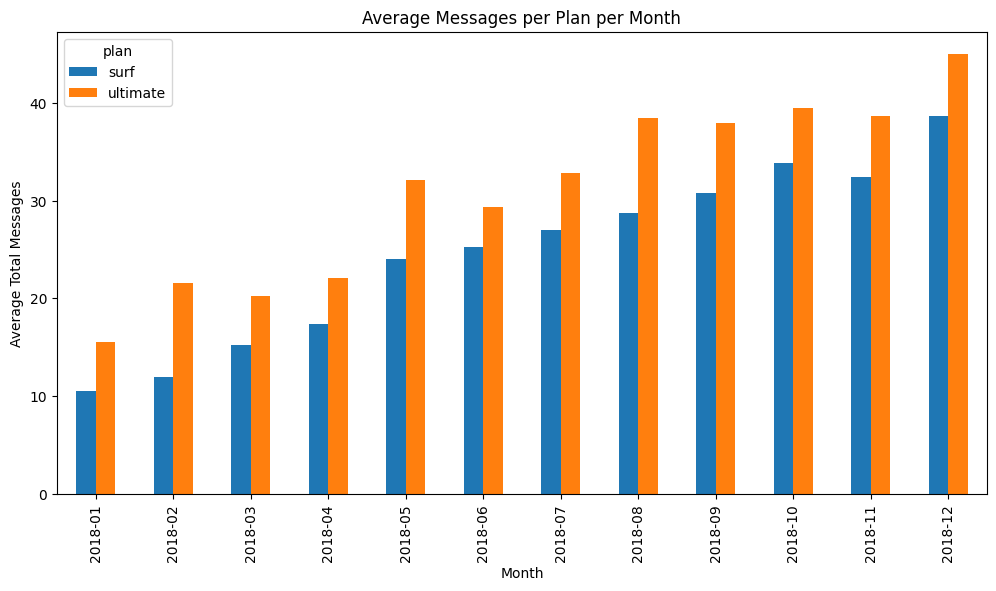

In [34]:
# Compare the number of messages users of each plan tend to send each month
avg_messages = user_monthly.groupby(['plan', 'month'])['total_messages'].mean().unstack()

avg_messages.T.plot(
    kind='bar', 
    figsize=(12,6), 
    title = 'Average Messages per Plan per Month', 
    xlabel = 'Month',
    ylabel = 'Average Total Messages',
)
plt.show()


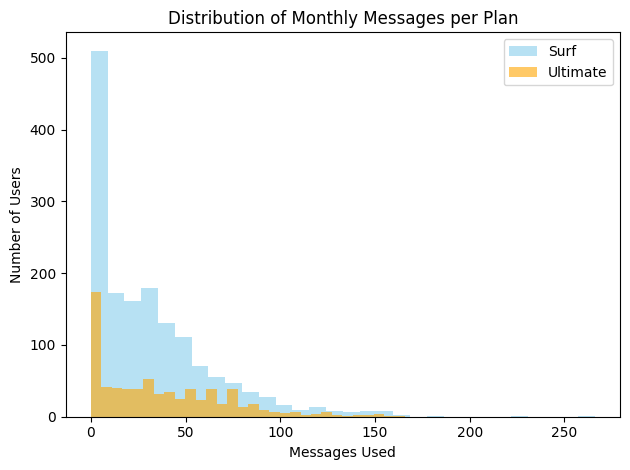

In [35]:
surf_messages = user_monthly[user_monthly['plan'] == 'surf']['total_messages']
ultimate_messages = user_monthly[user_monthly['plan'] == 'ultimate']['total_messages']

surf_messages.plot(kind = 'hist', bins = 30, alpha = 0.6, label = 'Surf', color = 'skyblue', title = 'Distribution of Monthly Messages per Plan')
ultimate_messages.plot(kind = 'hist', bins = 30, alpha = 0.6, label = 'Ultimate', color = 'orange')
plt.xlabel('Messages Used')
plt.ylabel('Number of Users')
plt.legend()
plt.tight_layout()
plt.show()

           mean      var
plan                    
surf      31.16  1126.72
ultimate  37.55  1208.76


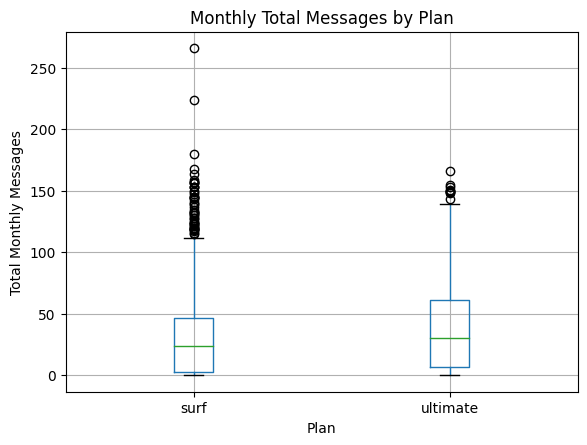

In [36]:
message_stats = user_monthly.groupby('plan')['total_messages'].agg(['mean', 'var']).round(2)
print(message_stats)
user_monthly.boxplot(column = 'total_messages', by = 'plan')
plt.title('Monthly Total Messages by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Total Monthly Messages')
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

The Ultimate plan has the higher median of monthly messages which shows that on average that the users of the Ultimate plan send more messages.

Ultimate has a higher/wider interquartile range which means that the Surf uusers have more tightly clustered behavior with the smaller interquartile range.

Both plans have outliers but Surf has more outliers than Ultimate. The highest message counts do come from Surf but they are just outliers.

### Internet

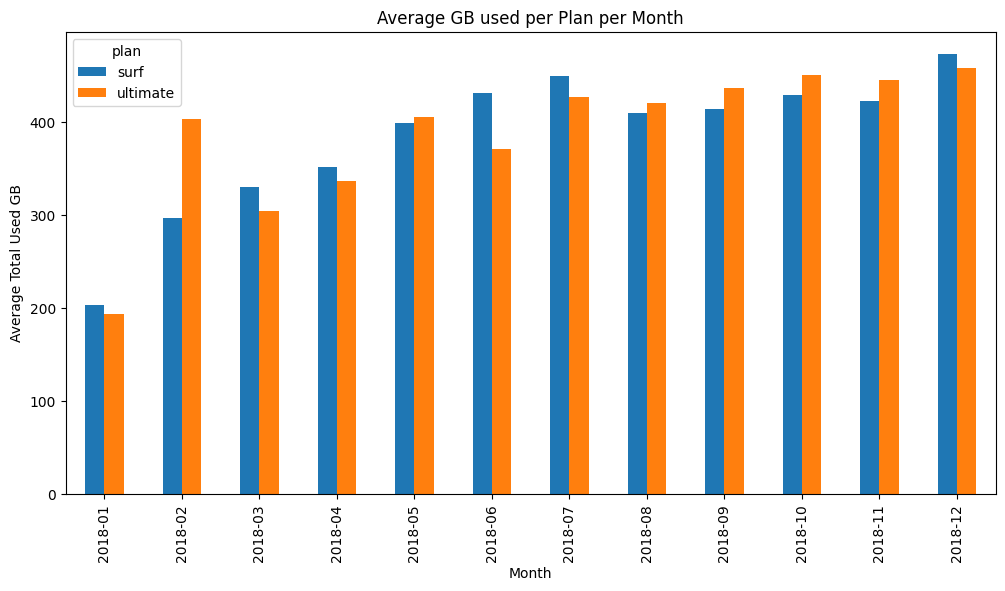

In [37]:
# Compare the amount of internet traffic consumed by users per plan
user_monthly['total_gb_used'] = np.ceil(user_monthly['total_mb_used'] / 1024)

avg_gb = user_monthly.groupby(['plan', 'month'])['total_gb_used'].mean().unstack()

avg_minutes.T.plot(
    kind='bar', 
    figsize=(12,6), 
    title = 'Average GB used per Plan per Month', 
    xlabel = 'Month',
    ylabel = 'Average Total Used GB',
)
plt.show()

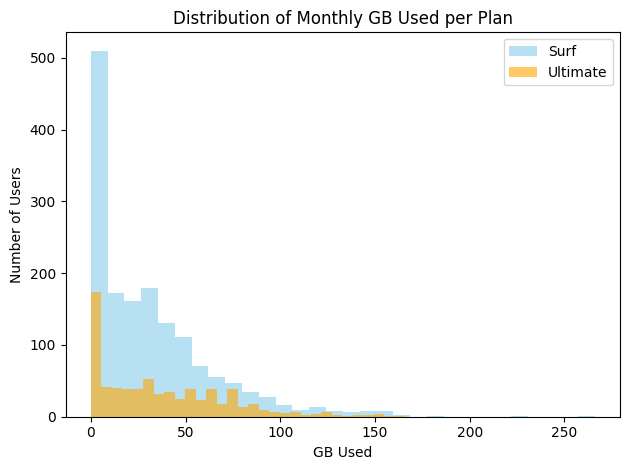

In [38]:
surf_gb = user_monthly[user_monthly['plan'] == 'surf']['total_gb_used']
ultimate_gb = user_monthly[user_monthly['plan'] == 'ultimate']['total_gb_used']

surf_messages.plot(kind = 'hist', bins = 30, alpha = 0.6, label = 'Surf', color = 'skyblue', title = 'Distribution of Monthly GB Used per Plan')
ultimate_messages.plot(kind = 'hist', bins = 30, alpha = 0.6, label = 'Ultimate', color = 'orange')
plt.xlabel('GB Used')
plt.ylabel('Number of Users')
plt.legend()
plt.tight_layout()
plt.show()

           mean    var
plan                  
surf      16.67  61.58
ultimate  17.31  58.83


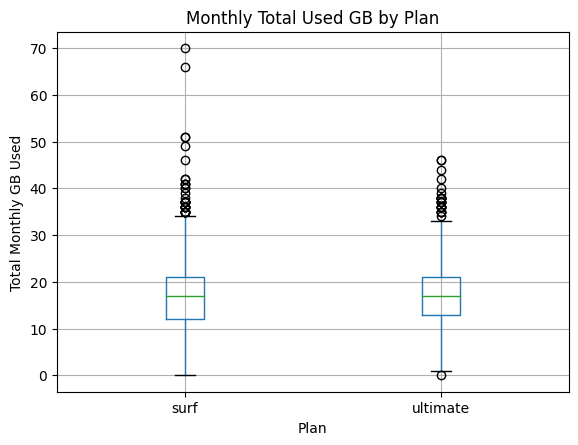

In [39]:
internet_stats = user_monthly.groupby('plan')['total_gb_used'].agg(['mean', 'var']).round(2)
print(internet_stats)
user_monthly.boxplot(column = 'total_gb_used', by = 'plan')
plt.title('Monthly Total Used GB by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Total Monthly GB Used')
plt.show()

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

Both plans have a very close median and the distributions of both plans are also similar in shape.

They also both have similar interquartile ranges which would indicate a somewhat similar spread.

While both have outliers, the users of Surf have outliers that even surpass 50gb a month.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

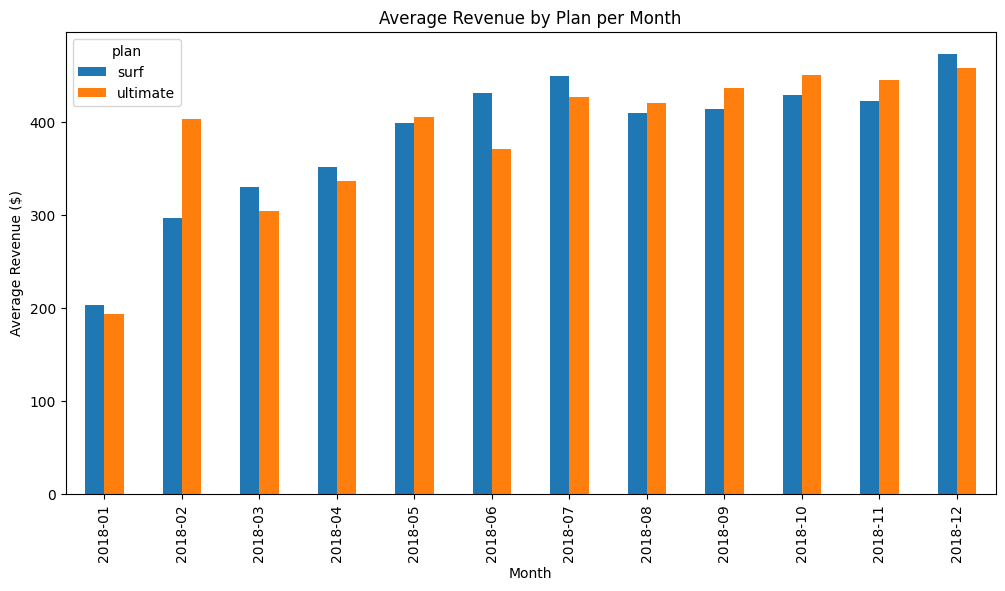

In [40]:
avg_revenue = user_monthly.groupby(['plan', 'month'])['monthly_revenue'].mean().unstack()

avg_minutes.T.plot(
    kind='bar', 
    figsize=(12,6), 
    title = 'Average Revenue by Plan per Month', 
    xlabel = 'Month',
    ylabel = 'Average Revenue ($)',
)
plt.show()

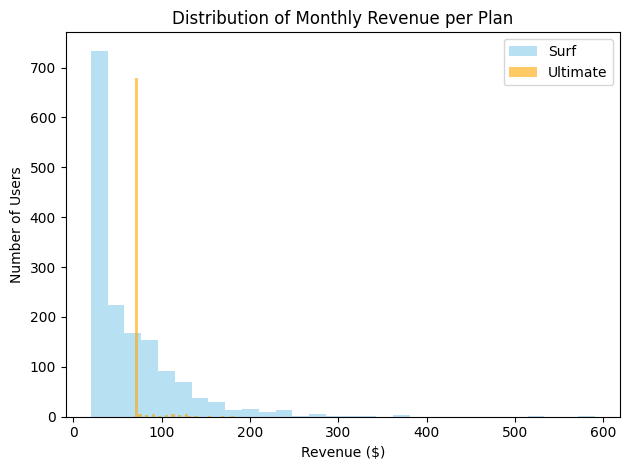

In [41]:
user_monthly.groupby('plan')['monthly_revenue'].agg(['mean', 'var', 'std'])

surf_revenue = user_monthly[user_monthly['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = user_monthly[user_monthly['plan'] == 'ultimate']['monthly_revenue']

surf_revenue.plot(kind = 'hist', bins = 30, alpha = 0.6, label = 'Surf', color = 'skyblue', title = 'Distribution of Monthly Revenue per Plan')
ultimate_revenue.plot(kind = 'hist', bins = 30, alpha = 0.6, label = 'Ultimate', color = 'orange')
plt.xlabel('Revenue ($)')
plt.ylabel('Number of Users')
plt.legend()
plt.tight_layout()
plt.show()


           mean      var
plan                    
surf      60.71  3067.84
ultimate  72.31   129.85


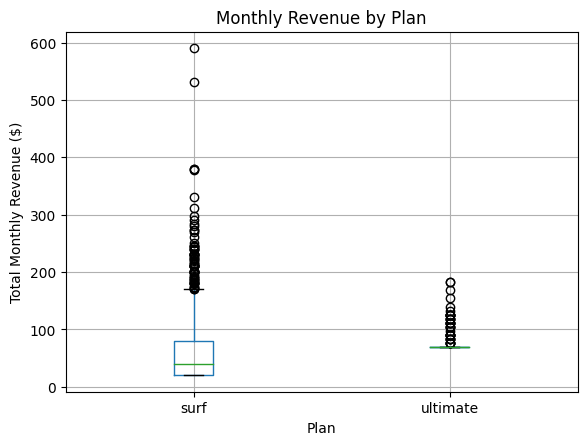

In [42]:
revenue_stats = user_monthly.groupby('plan')['monthly_revenue'].agg(['mean', 'var']).round(2)
print(revenue_stats)
user_monthly.boxplot(column = 'monthly_revenue', by = 'plan')
plt.title('Monthly Revenue by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Total Monthly Revenue ($)')
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

Ultimate has a higher median, for higher average monthly income. The Ultimate plan also has almost no interquartile range which shows very little variation compared to the users of Surf.

While both have outliers, Surf has significantly more outliers compared to Ultimate. I would say this is due to how much more is included in the plan of Ultimate which would mean that users wouldn't need to go over what their plan includes as much.

When comparing the variance of the two plans, Surf has a much higher variance which would mean that their users monthly revenue is much more spread out and unpredictable compared to that of Ultimate.

I would say from the data, Ultimate has a much more consistant and stable revenue per user which is likely due to the higher base fee and reduced overage charges.

Surf is more variable with high revenues for the heavy users but much lower for those who stay within their basic allowance.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Based on the hypotheses, the null hypotheses would be:
 - The average monthly revenue of Surf and Ultimate users is equal.

An alternative hypothesis could be:
- The average monthly revenue of Surf and Ultimate users is different.

The alpha value will be 0.05

In [43]:
# Test the hypotheses
surf_revenue = user_monthly[user_monthly['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = user_monthly[user_monthly['plan'] == 'ultimate']['monthly_revenue']

alpha = 0.05
results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis: there is a statistically significant difference in average revenue between the plans.')
else:
    print("We can't reject the null hypothesis: no statistically significant difference in average revenue between the plans.")


p-value: 3.1703905481135734e-15
We reject the null hypothesis: there is a statistically significant difference in average revenue between the plans.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

The Null Hypothesis:
- The average monthly revenue of users within the NY-NJ area will be equal to that of users from other regions.

The Alternative Hypothesis:
- The average monthly revenue from the users within the NY-NJ area will be different from those of users from other regions.

In [44]:
# Test the hypotheses
ny_nj_mask = user_monthly['city'].str.contains('NY-NJ', case = False)

revenue_ny_nj = user_monthly[ny_nj_mask]['monthly_revenue']
revenue_other = user_monthly[~ny_nj_mask]['monthly_revenue']

alpha = 0.05
results = st.ttest_ind(revenue_ny_nj, revenue_other, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis: there's a statistically significant difference in average revenue between NY-NJ and other regions.")
else:
    print("We can't reject the null hypothesis: there's no statistically significant difference.")

p-value: 0.0335256158853001
We reject the null hypothesis: there's a statistically significant difference in average revenue between NY-NJ and other regions.


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

## General conclusion
## Assumptions:
- During this analysis, we used the data from plans for the correct usage. Surf including 500 minutes, 50 messages and 15 GB. Ultimate including 3000 minutes, 1000 messages and 30 GB.
- Revenue was calculated by subtracting the plan's included services then applying the overage charges before then adding the fixed monthly fee.
## Data Cleaning
- There were many of the date columns that were formatted as objects rather than datetime so converted all of those to then extract the month to use it in our per-user monthly aggregation.
- We created a total_gb_used column to convered the mg to GB by dividing them by 1024, since the plan is based on GB not mb.
- Created an unsed boolean has_churned column just in case we needed a quick check to see if the user was still with the plan.
- Merged a bunch of user information into a monthly dataset with aggregated monthly usage for calls, messages and internet to conduct a better analysis.
## Behavior Analysis
- Calls: Ultimate users consistently used more minutes per month on average when compared to Surf users. The boxplot also showed that there is a higher variance for Surf users.
- Messages: Surf users on average sent far fewer messages while Ultimate users took advantage of their plans higher message cap.
- Internet Usage: Users of both plans showed high data usage, but still Ultimate users had a higher average and a higher included allowance.
## Revenue
- The users of Surf's plan had more variance per user but on average the revenue was lower than that of the Ultimate plan.
    - Surf average monthly revenue: $60.71
    - Ultimate average monthly revenue: $72.31
- This means that Surf's users can generate more revenue per moth due to the overage charges, Ultimate will be more consistently profitable.
## Hypothesis Testing
- Test 1: Revenue difference between Surf and Ultimate
    - Null hypothesis: There is no difference in average revenue between Surf and Ultimate plans
    - Alternative hypothesis: There is a difference in average revenue between the two plans
    - Result: p-value = 3.1703905481135734e-15
    - It is significantly less than the alpha value of 0.05 meaning that we reject the null hypothesis
    - Conclusion: there is a statistical difference in the average revenue between the two plans.
- Test 2: Revenue difference by Region(NY-NJ vs. others)
    - Null hypothesis: The average revenue in the NY-NJ region is the same as in other regions
    - Alternative hypothesis: The average revenue in NY-NJ region is different to the other regions.
    - Result: P-value = 0.0335256158853001
    - Conclusion: We reject the null hypothesis: there's a statistically significant difference in average revenue between NY-NJ and other regions.